# 1. Finding the Eigenvalues and Eigenvectors of 1D Cycle Matrices Without Considering Spin 

# 1.1 Creating the Adjacancy and Hamiltonian matrix for a given 1D system, along with computing the eigenvectors/values

In [5]:
# The system analyzed will be 1D cycle matrix with no interactions present.

# Importing required libraries.
import numpy as np
import matplotlib.pyplot as plt

# Defining required constants.
J = 1
valid_input = False

# 1. Generating a 1D Cycle Adjacency Matrix. 
# Defining a function that generates a 1D adjacency matrix of varying amounts of nodes with periodic boundary conditions depending on user input.
def create_cycle_adjacency_matrix(num_nodes):
    # Creating a square matrix with the row and column number desired by the user. 
    #The matrix will initially only contain zeros as entries.
    adjacency_matrix = np.zeros((num_nodes, num_nodes)) 
    
    # Changing the required matrix elements from 0 to 1 to indicate a possible hopping site using periodic boundary conditions.
    for i in range (num_nodes):
        # generated_matrix[row][column]
        adjacency_matrix[i][(i + 1) %num_nodes] = 1 
        adjacency_matrix[i][(i - 1) %num_nodes] = 1
        
    return(adjacency_matrix)
    

# Calling for user input to generate desired matrix.
while valid_input == False:

    try:
        num_nodes = int(input("Enter desired number of nodes for the 1D cycle adjacency matrix: "))
    
        if num_nodes < 2:
            print("The number of nodes must be at least 2 and an integer. Re-input the number of nodes desired.")
        else:
            # Generating and printing the desired matrix.
            adjacency_matrix = create_cycle_adjacency_matrix(num_nodes)
            print("Cycle Adjacency Matrix:")
            print(adjacency_matrix)
            valid_input = True
    
    except ValueError:
        print("The number of nodes must be an integer. Re-input the number of nodes desired.")

# 2. Constructing the Hamiltonian Matrix.
def create_hamiltonian_1D(adjacency_matrix):
# H = -JA, where the parameter J will be set as 1 for now. 
    hamiltonian_1D = (-1) * J * adjacency_matrix
    
    return(hamiltonian_1D)

hamiltonian_1D = create_hamiltonian_1D(adjacency_matrix)
print("Hamiltonian Matrix:")
print(hamiltonian_1D)

# 3. Determining the Eigenvectors and Eigenvalues ---------------------------------------------------------------------------------------------------

ham_1D_eigenvalues, ham_1D_eigenvectors = np.linalg.eig(hamiltonian_1D)
print(f"Eigenvalues of the hamiltonian of a system of {num_nodes} nodes:", ham_1D_eigenvalues)
# The eigenvectors are displayed as column vectors
print(f"Eigenvectors of the hamiltonian of a system of {num_nodes} nodes: \n", ham_1D_eigenvectors)

Enter desired number of nodes for the 1D cycle adjacency matrix:  3


Cycle Adjacency Matrix:
[[0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]
Hamiltonian Matrix:
[[-0. -1. -1.]
 [-1. -0. -1.]
 [-1. -1. -0.]]
Eigenvalues of the hamiltonian of a system of 3 nodes: [ 1. -2.  1.]
Eigenvectors of the hamiltonian of a system of 3 nodes: 
 [[ 0.81649658 -0.57735027  0.09265789]
 [-0.40824829 -0.57735027 -0.74886783]
 [-0.40824829 -0.57735027  0.65620994]]


# 1.2 Plotting the energy levels for the cases of N = 2,3,4 side by side in an energy level diagram and analyzing how the characteristic energy level spacing changes with N.

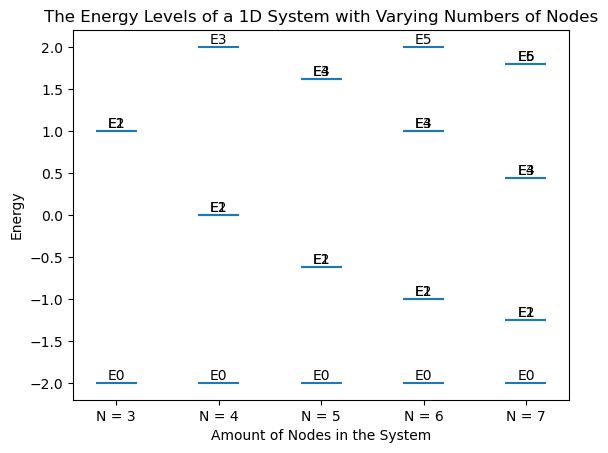

In [40]:
# Visualization 1: Energy Level Diagram.

# Creating a series of energy level diagrams for various systems with different amounts of nodes (N). For each N, the quantized energy
# levels are displayed. The plots will be displayed horizontally to show how the energy levels vary as N changes.

# Creating a specific list of node values for plotting.
node_values = [3, 4, 5, 6, 7]

# Defining a function to execute the entire process for the calculation and sorting of the eigenvalues of a system with N nodes.
def calculate_and_sort_eigenvalues(N):
    adjacency_matrix = create_cycle_adjacency_matrix(N)
    hamiltonian_1D = create_hamiltonian_1D(adjacency_matrix)
    ham_1D_eigenvalues, ham_1D_eigenvectors = np.linalg.eig(hamiltonian_1D)

    # Sorting the eigenvalues from lowest to highest for consistent labeling later.
    sorted_eigenvalues = np.sort(np.real(ham_1D_eigenvalues)) # Making sure all eigenvalues are real for functions that follow.
    return (sorted_eigenvalues)
    
# Iterating through the list of node values for plotting.
for node_index, N in enumerate (node_values): # Gives an index to each individual number of nodes for plotting.
# Computing the adjacency matrix, hamiltonian matrix, and eigenvalues for each N we wish to plot.
    sorted_eigenvalues = calculate_and_sort_eigenvalues(N)
# Plotting the derived eigenvalues (energy levels) for each value of N.
    for eigenvalue_index, e in enumerate(sorted_eigenvalues):
# Plotting a horizontal line for energy level.
        plt.hlines(e, node_index - 0.2, node_index + 0.2) 
# Labelling each horizontal line with its respective energy level number.
        plt.text(node_index, e, f"E{eigenvalue_index}",va = 'bottom', ha = 'center', fontsize = 10)  

plt.ylabel("Energy")
plt.xlabel("Amount of Nodes in the System")
plt.xticks(range(len(node_values)), [f"N = {N}" for N in node_values])
plt.title("The Energy Levels of a 1D System with Varying Numbers of Nodes")
plt.show()

# 1.3 Plotting the energy level differences for each N to show how the energy level spacings vary as N increases. 

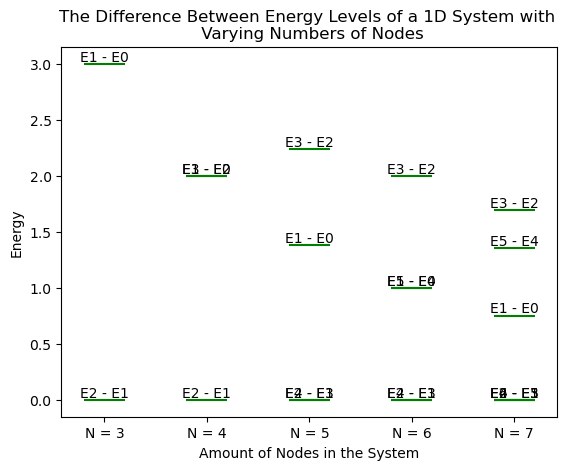

In [38]:
# Visualization 2: Energy Level Spacing Analysis.

# The energy level spacings will be calculated and plotted for each N. The plots will be displayed horizontally to show how the energy level spacings
# vary as N increases. 

# Creating a specific list of node values for plotting (same as above to be consistent).
node_values = [3, 4, 5, 6, 7]

# Iterating through the list of node values for plotting.
for node_index, N in enumerate (node_values): # Gives an index to each individual number of nodes for plotting.
# Defining a list which will hold all of the energy level spacing difference values for plotting.
    eigenvalue_difference_list = []
# Executing the process to calculate the eigenvalues for each N.
    sorted_eigenvalues = calculate_and_sort_eigenvalues(N)
# Calculating the difference between the eigenvalues (energy-level spacings).
    for i in range(len(sorted_eigenvalues) - 1):
        e_diff = sorted_eigenvalues[i + 1] - sorted_eigenvalues[i]
        eigenvalue_difference_list.append(e_diff) 

    for eigenvalue_difference_index, d in enumerate(eigenvalue_difference_list):
# Plotting the energy-level spacings for each N.
# Plotting a horizontal line for energy level difference.
        plt.hlines(d, node_index - 0.2, node_index + 0.2, color = 'green') 
# Labelling each horizontal line with its respective energy level difference label.
        plt.text(node_index, d, f"E{eigenvalue_difference_index + 1} - E{eigenvalue_difference_index}",va = 'bottom', ha = 'center', fontsize = 10)        

plt.ylabel("Energy")
plt.xlabel("Amount of Nodes in the System")
plt.xticks(range(len(node_values)), [f"N = {N}" for N in node_values])
plt.title("The Difference Between Energy Levels of a 1D System with \n Varying Numbers of Nodes")
plt.show()

# 2. Finding the Eigenvalues and Eigenvectors of 2D Cycle Matrices Without Considering Spin

In [40]:
# Creating the 2D Hamiltonian using tensor products of 1D Hamiltonians in the x and y directions.
# Model for the Hamiltonian of a 2D lattice: H_x (tensor product) I_y + I_x (tensor product) H_y

# Defining required constants.
valid_input = False

while valid_input == False:
    try:
        x_nodes = int(input("Enter the desired number of nodes in the x-direction: "))
        y_nodes = int(input("Enter the desired number of nodes in the y-direction: "))
        
        if x_nodes < 2 or y_nodes < 2:
            print("Each dimension must have at least 2 nodes.")
        elif x_nodes != y_nodes:
            print(" The x and y dimensions must be equal to form a square lattice.")
        else:
            valid_input = True
    except ValueError:
        print("The number of nodes must be an integer. Re-input the number of nodes desired.")

def create_hamiltonian_2D(x_nodes, y_nodes):
    # Creating the x and y identity matrices.
    identity_x = np.eye(x_nodes) # Creates a (x_nodes) x (x_nodes) identity matrix.
    identity_y = np.eye(y_nodes) # Creates a (y_nodes) x (y_nodes) identity matrix.
    
    # Creating the adjacency matrices that represent hopping in the x and y directions respectively with periodic boundary conditions.
    adjacency_matrix_x = create_cycle_adjacency_matrix(x_nodes)
    adjacency_matrix_y = create_cycle_adjacency_matrix(y_nodes)
    
    # Defining the 1D Hamiltonian for hopping in the x and y directions respectively.
    hamiltonian_x = create_hamiltonian_1D(adjacency_matrix_x)
    hamiltonian_y = create_hamiltonian_1D(adjacency_matrix_y)
    
    # Creating the 2D Hamiltonian from the model H_2D = H_x (tensor product) I_y + I_x (tensor product) H_y
    hamiltonian_2D = np.kron(hamiltonian_x, identity_y) + np.kron(identity_x, hamiltonian_y)
    return (hamiltonian_2D)

hamiltonian_2D = create_hamiltonian_2D(x_nodes, y_nodes)
print(f"The Hamiltonian of a 2D {x_nodes} x {y_nodes} lattice:")
print(hamiltonian_2D)

# Determining the eigenvalues and eigenvectors from the Hamiltonian of the 2D square lattice.
ham_2D_eigenvalues, ham_2D_eigenvectors = np.linalg.eig(hamiltonian_2D)
print(f"Eigenvalues of the Hamiltonian of a 2D {x_nodes} x {y_nodes} lattice:", ham_2D_eigenvalues)
# The eigenvectors are displayed as column vectors.
print(f"Eigenvectors of the Hamiltonian of a 2D {x_nodes} x {y_nodes} lattice: \n", ham_2D_eigenvectors)

Enter the desired number of nodes in the x-direction:  3
Enter the desired number of nodes in the y-direction:  3


The Hamiltonian of a 2D 3 x 3 lattice:
[[-0. -1. -1. -1. -0. -0. -1. -0. -0.]
 [-1. -0. -1. -0. -1. -0. -0. -1. -0.]
 [-1. -1. -0. -0. -0. -1. -0. -0. -1.]
 [-1. -0. -0. -0. -1. -1. -1. -0. -0.]
 [-0. -1. -0. -1. -0. -1. -0. -1. -0.]
 [-0. -0. -1. -1. -1. -0. -0. -0. -1.]
 [-1. -0. -0. -1. -0. -0. -0. -1. -1.]
 [-0. -1. -0. -0. -1. -0. -1. -0. -1.]
 [-0. -0. -1. -0. -0. -1. -1. -1. -0.]]
Eigenvalues of the Hamiltonian of a 2D 3 x 3 lattice: [ 2. -1. -4. -1.  2. -1.  2.  2. -1.]
Eigenvectors of the Hamiltonian of a 2D 3 x 3 lattice: 
 [[-0.66666667  0.66666667 -0.33333333  0.11324429 -0.24595211 -0.0090808
  -0.03474412 -0.04458823 -0.00251045]
 [ 0.33333333  0.16666667 -0.33333333 -0.53493029  0.65959883 -0.02226828
   0.08808924  0.0808107  -0.23151237]
 [ 0.33333333  0.16666667 -0.33333333 -0.37400418 -0.41364672  0.12961424
  -0.05334512 -0.03622247  0.54166076]
 [ 0.33333333  0.16666667 -0.33333333  0.51108938  0.12297605 -0.45668828
   0.40567488  0.08066776 -0.18878083]
 [-0.1666